# Visualizing the outcome of collisions

This notebook highlights how we process the output of our two-body cell collisions, and it showcases the plots presented in the main text.

<span style="font-size:25px">⚠️</span> **Caution:** 

We have optimized the codebase since the initial publication of the paper. Thus, the figures presented in this notebook will not match those in the paper one-to-one since the underlying data is different due to noise fluctuations (here we have $D_\psi=0.075\ \rm rad^2/hr$). 

Although the numerical values do not match exactly, *quantitative* and *qualitative* behaviors exposed in the main paper are still present.

In [1]:
from analysis import analysis
import pandas as pd

### Processing the output

The results of a simulation are stored as a `.csv` within `output/`. In particular, the following information exists:

1. surface tension $\gamma$, 
2. adhesion to the substrate $A$, 
3. strength of protrusion $\beta$,
4. center-of-mass speed $v_{\rm CM}$,
5. contact angle $\theta$, and
6. the binary representation of whether cells trained to the left (1) or to the right (0).

The last two observables are time series collected only after the cell has equilibrated and before it has collided -- this constitutes the pre-collision history.

At the end of the day, we want relative center-of-mass speeds and contact angles averaged over the pre-collision times, defined as $\delta v=v_R - v_L$ and $\delta \theta = \theta_R - \theta_L$, respectively. `process_data.py` does this for us and stores the processed results in `processed/*.csv`. In particular, the columns present are:

1. surface tension $\gamma$, 
2. adhesion to the substrate $A$, 
3. strength of protrusion $\beta$,
4. $\delta v$ in $\mu \rm m/ min$,
5. $\delta \theta$ in degrees, and
6. $P_{\rm win}$, the binary representation of whether cells trained to the left (1) or to the right (0).

In [2]:
binary_outcomes = pd.read_csv("../processed/sva_binary_outcomes.csv").drop(
    columns=["Unnamed: 0"]
)
binary_outcomes.head(5)

,gamma,A,beta,dv,dtheta,Pwin
0,1.05,0.448,5.2,-0.030432,-1.410535,0
1,1.05,0.448,5.2,-0.029269,-1.123907,1
2,1.05,0.448,5.2,-0.043996,-0.363567,0
3,1.05,0.448,5.2,-0.040414,-0.013436,0
4,1.05,0.448,5.2,-0.036757,-1.054072,0


We also make use of two other representation of collision data:

1. `agg_outcomes` -- results averaged over 96 runs, all with a given set of $(\gamma, A,\beta)$.
2. `binary_ac_outcomes` -- individual collision results, restricted to when $\delta v$ and $\delta \theta$ anti-correlate

In [3]:

binary_outcomes["quadrant"] = binary_outcomes.apply(
    lambda x: analysis._quadrant(x) - 1, axis=1
)
binary_ac_outcomes = binary_outcomes.query("quadrant == 0 or quadrant == 2")
agg_outcomes = binary_outcomes.groupby(["gamma", "A", "beta"]).apply("mean")
agg_outcomes.quadrant = agg_outcomes.apply(lambda x: analysis._quadrant(x) - 1, axis=1)

display("Individual collision results", binary_ac_outcomes.head(5))
display("Results averaged over 96 runs", agg_outcomes.reset_index().head(5))


'Individual collision results'

,gamma,A,beta,dv,dtheta,Pwin,quadrant
0,1.05,0.448,5.2,-0.030432,-1.410535,0,2
1,1.05,0.448,5.2,-0.029269,-1.123907,1,2
2,1.05,0.448,5.2,-0.043996,-0.363567,0,2
3,1.05,0.448,5.2,-0.040414,-0.013436,0,2
4,1.05,0.448,5.2,-0.036757,-1.054072,0,2


'Results averaged over 96 runs'

,gamma,A,beta,dv,dtheta,Pwin,quadrant
0,0.9,0.32,4.0,-0.123295,19.333337,0.000000,1
1,0.9,0.32,5.2,-0.090094,11.726235,0.020833,1
2,0.9,0.32,6.4,-0.058785,5.245847,0.083333,1
3,0.9,0.32,7.6,-0.029909,-0.429834,0.218750,2
4,0.9,0.32,8.8,-0.007455,-4.542411,0.302083,2


### We have the data; let's now make plots

Figure 1:
   - this is simply the view of the simulation box
   - due to file size, only one sample is attached here
   - note that the figure in the paper shows three cases and is further annotated for clarity

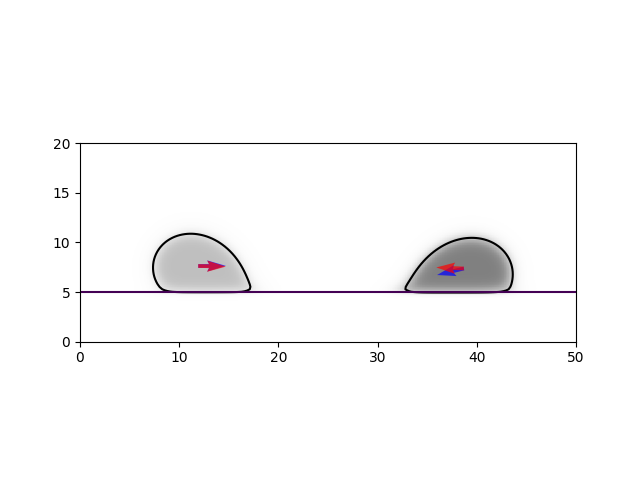

In [4]:
analysis.simbox_view("../processed/sample_simbox.png")

Figure 2 was drawn in PowerPoint

Figure 3:
   - visualizes how $P_{\rm win}$, $\delta v$, and $\delta \theta$ vary as a function of two cell attributes with the third held fixed

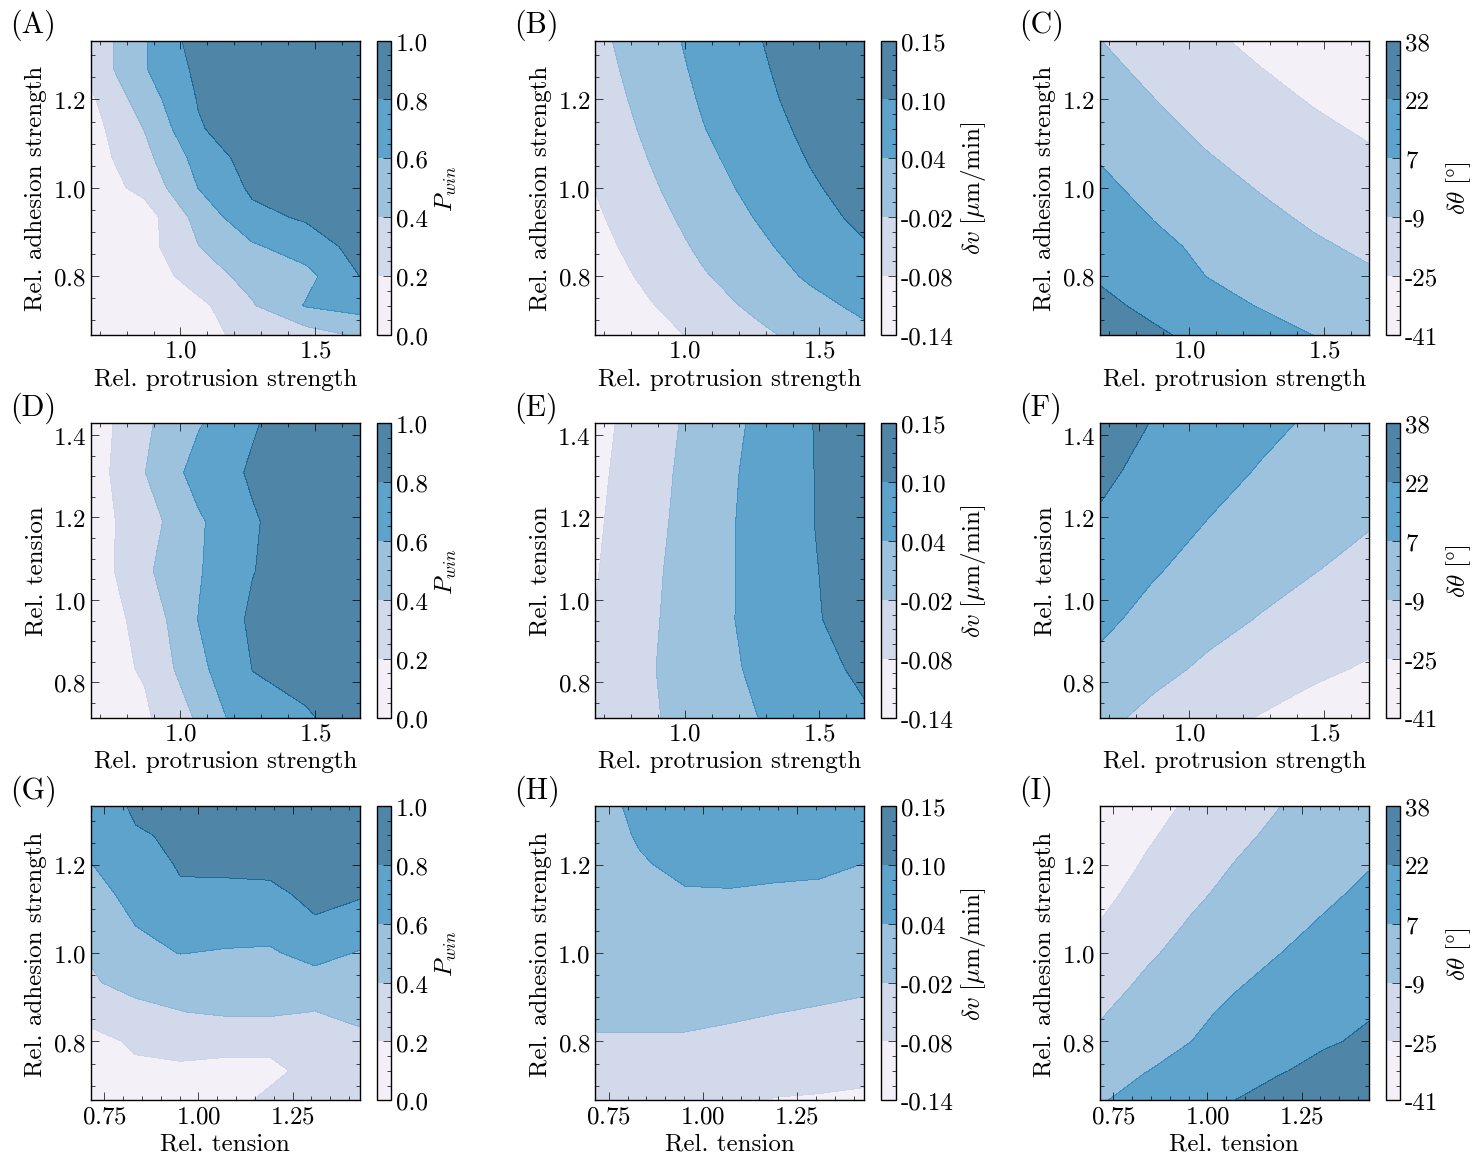

In [5]:
fig_3 = analysis.two_feature_plots(binary_outcomes)

Figure 4:
   - visualizes how $P_{\rm win}$ varies with $\delta v$ and $\delta \theta$
   - performs logistic regressions on both the potential predictors to conclude which is the predictor and which the correlator

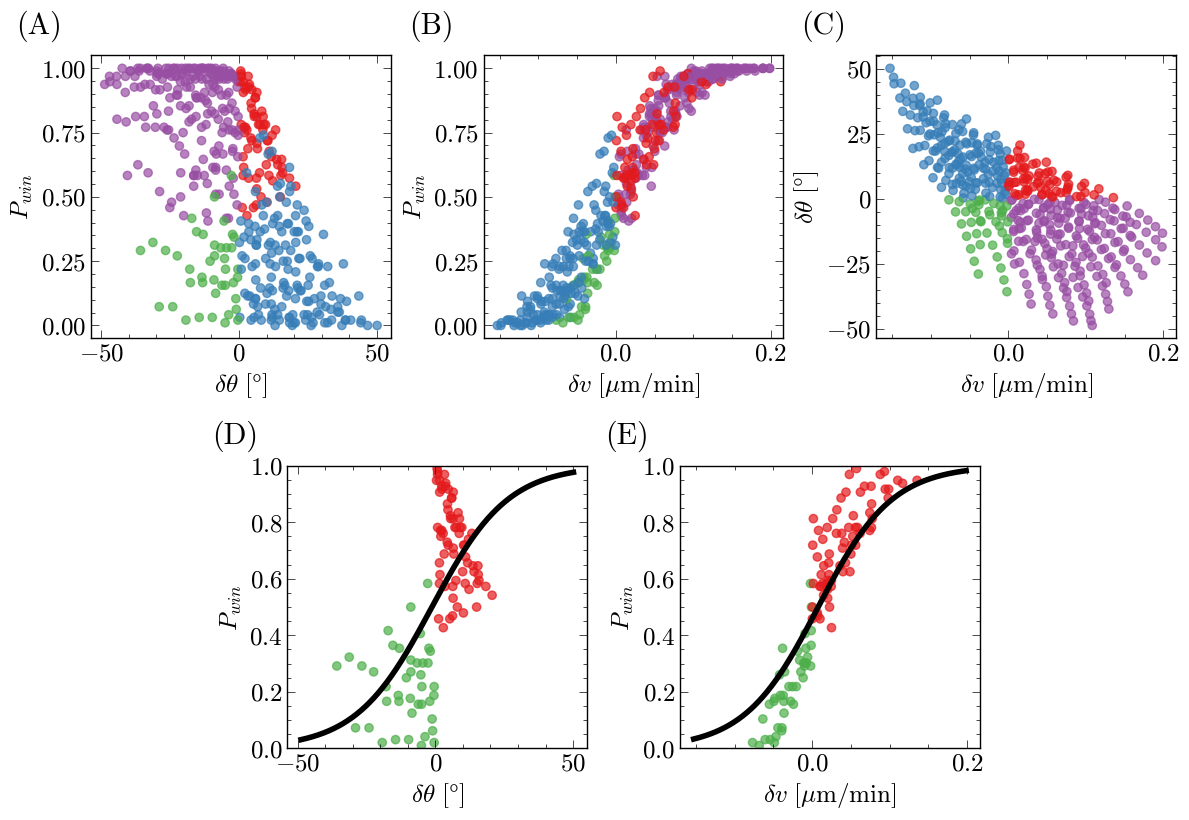

In [6]:
fig_4 = analysis.predictor_plots(agg_outcomes, binary_ac_outcomes)

Figure 5:
   - $P_{\rm win}(\delta v)$ along with logistic regression curves and 95% Binomial confidence intervals
   - the case of $\tau_{\rm VA}=24\ \rm min$ is shown

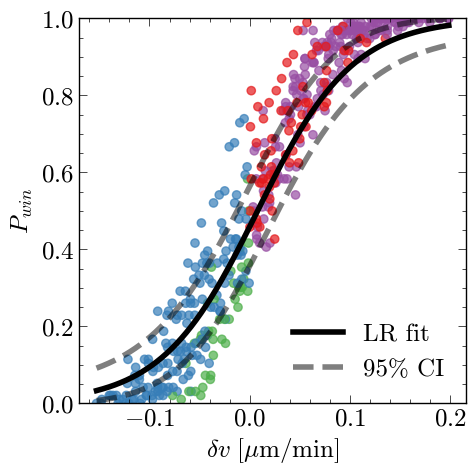

In [7]:
fig_5 = analysis.Pwin_plot(
    "dv", agg_outcomes, binary_ac_outcomes, fit_lr=True, conf_int=True, legend=True
)

Figure 6 was drawn in PowerPoint

Let's now read collision data with the FFCR polarity model

In [8]:
binary_outcomes = pd.read_csv("../processed/ffcr_binary_outcomes.csv").drop(
    columns=["Unnamed: 0"]
)

binary_outcomes["quadrant"] = binary_outcomes.apply(
    lambda x: analysis._quadrant(x) - 1, axis=1
)
binary_ac_outcomes = binary_outcomes.query("quadrant == 0 or quadrant == 2")
agg_outcomes = binary_outcomes.groupby(["gamma", "A", "beta"]).apply("mean")
agg_outcomes.quadrant = agg_outcomes.apply(lambda x: analysis._quadrant(x) - 1, axis=1)


Figure 7:
   - same as Figure 3, but for FFCR model

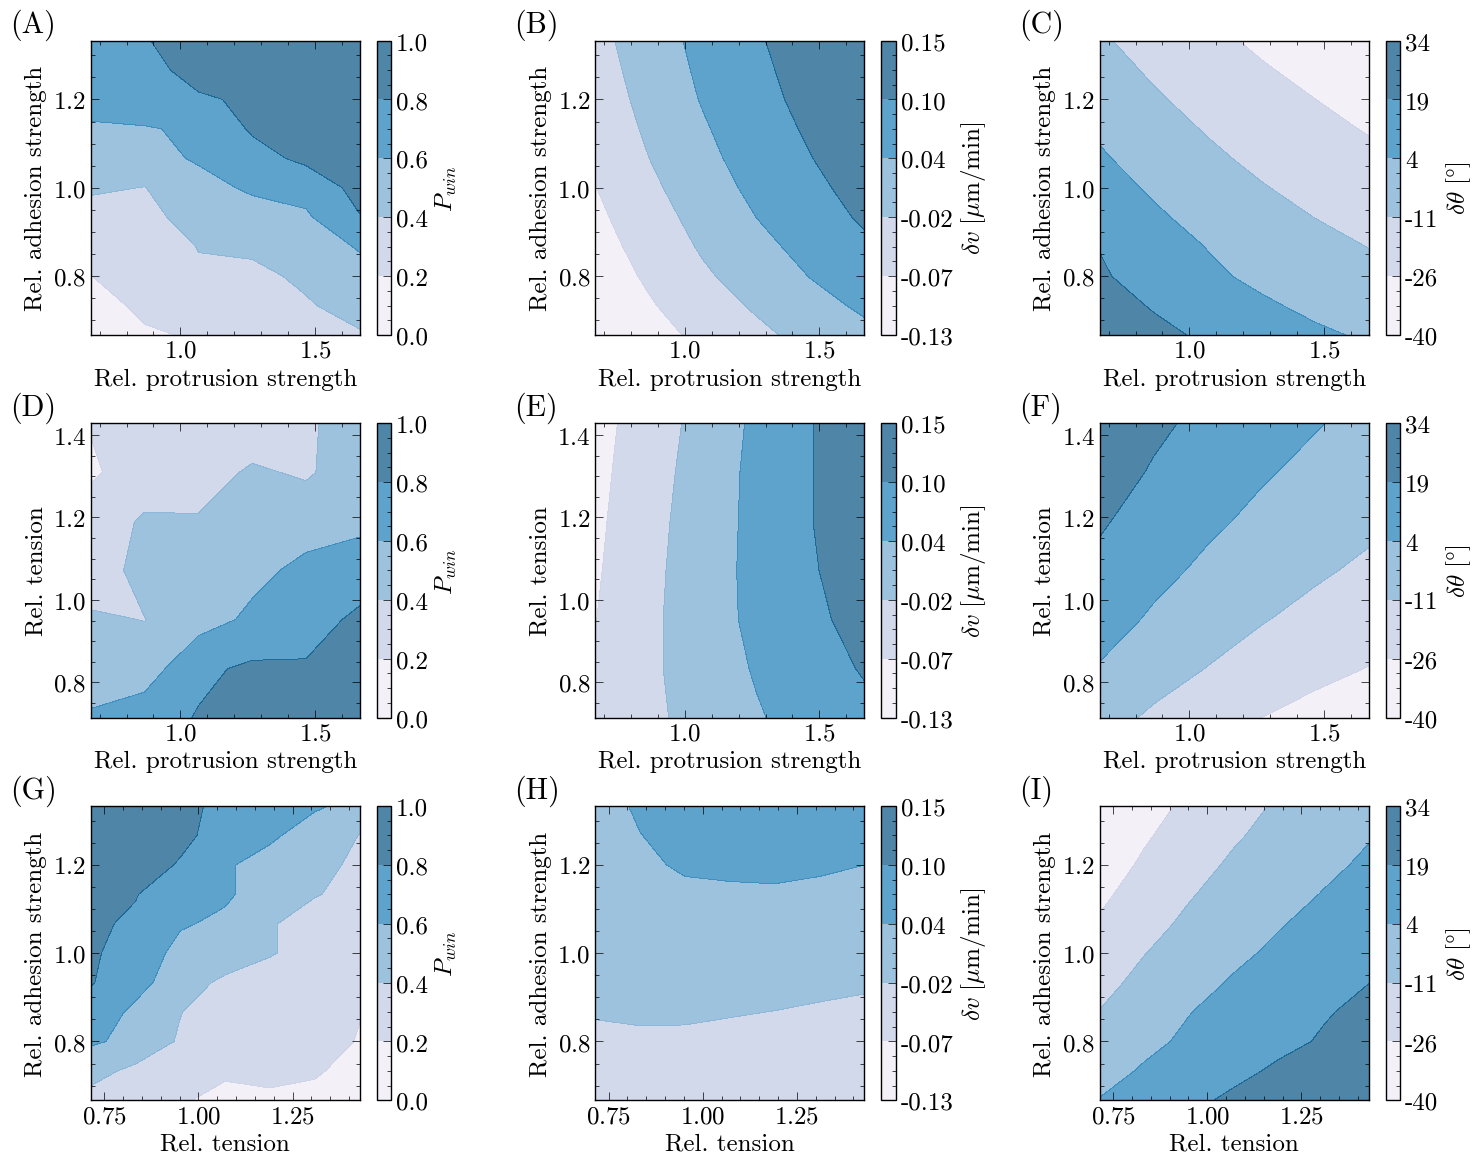

In [9]:
fig_7 = analysis.two_feature_plots(binary_outcomes)

Figure 8:
   - same as Figure 4, but for FFCR model

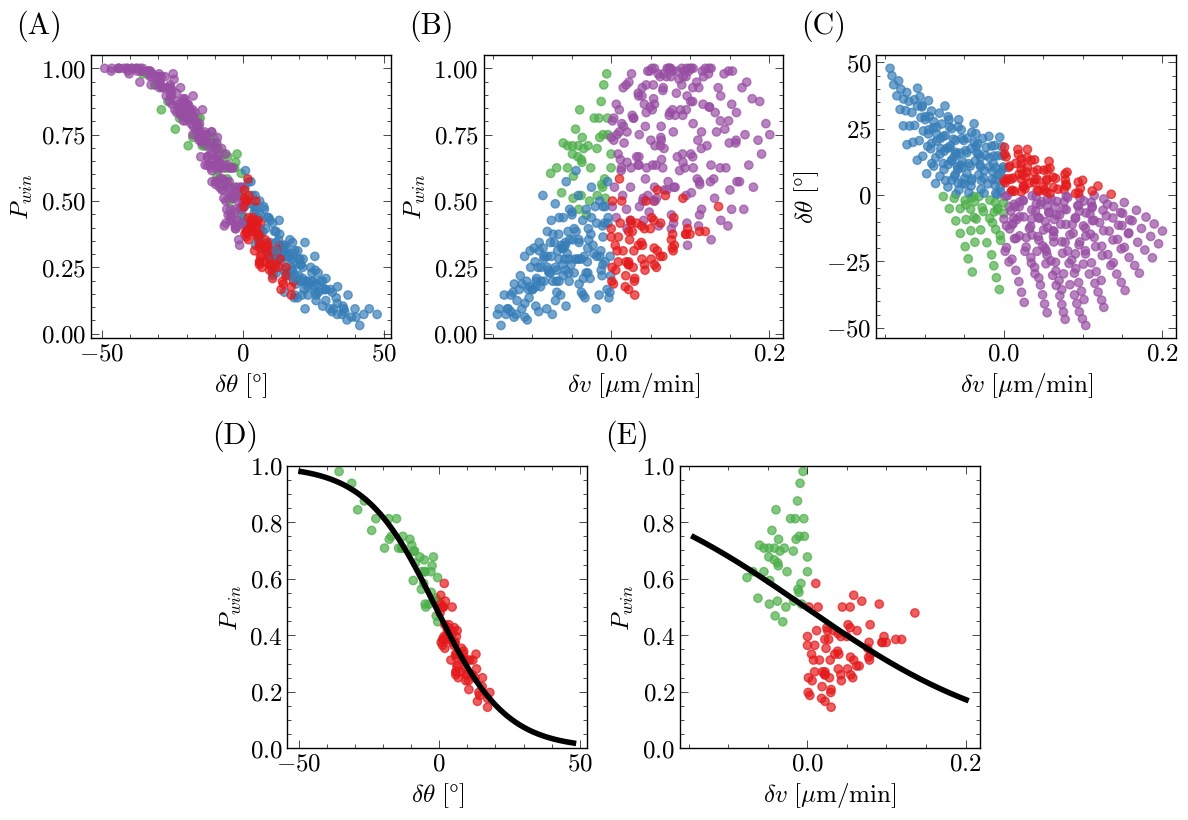

In [10]:
fig_8 = analysis.predictor_plots(agg_outcomes, binary_ac_outcomes)

Figure 9 can be made by mixing and matching the output of `analysis.Pwin_plot(...)`

Figure 10 was made in PowerPoint

Figure 11:
   - visualize how sensitive simulation dynamics are on the choice of timestep used

Figure 12 was drawn in PowerPoint

Figure 13:
   - analytical solution to the deterministic FFCR model
   - plot of repolarization time as a function of target direction

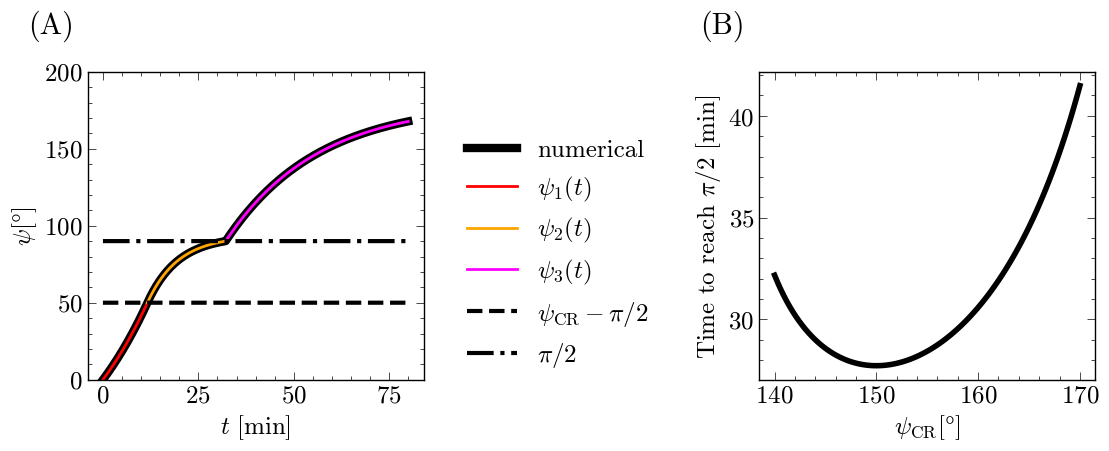

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("../configs/stylesheet.mplstyle")
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

# plot polarity angle as it relaxes to target direction
analysis._ffcr_det_sol(140, axs[0], "(A)", True)

# plot time to reach pi/2 as a function of target direction
thetacrs = np.linspace(140, 170, 100)
tdprime = [analysis._ffcr_det_sol(thetacr) for thetacr in thetacrs]
axs[1].set_title("(B)", x=-0.11, y=1.1)
axs[1].plot(thetacrs, tdprime, lw=4, c="black")
axs[1].set_xlabel(r"$\psi_{\rm CR}[\degree]$")
axs[1].set_ylabel(r"Time to reach $\pi/2$ [min]")
plt.subplots_adjust(wspace=1)

### How well can we predict the winning fraction under each of the polarity models?

- FFCR model

In [13]:
binary_outcomes = pd.read_csv("../processed/sva_binary_outcomes.csv").drop(
    columns=["Unnamed: 0"]
)

X = binary_outcomes.dtheta.values.reshape(-1, 1)
y = binary_outcomes.Pwin.values
analysis.predictive_power(X, y, predictor="dtheta")

X = binary_outcomes.dv.values.reshape(-1, 1)
y = binary_outcomes.Pwin.values
analysis.predictive_power(X, y, predictor="dv")


dtheta predicts the winning probability with the following confidence:
	- score: 72.0% +/- 0.3%
	- brier score: 0.181 +/- 0.002
dv predicts the winning probability with the following confidence:
	- score: 64.4% +/- 0.6%
	- brier score: 0.220 +/- 0.002


- VA model

In [14]:
binary_outcomes = pd.read_csv("../processed/sva_binary_outcomes.csv").drop(
    columns=["Unnamed: 0"]
)

X = binary_outcomes.dtheta.values.reshape(-1, 1)
y = binary_outcomes.Pwin.values
analysis.predictive_power(X, y, predictor="dtheta")

X = binary_outcomes.dv.values.reshape(-1, 1)
y = binary_outcomes.Pwin.values
analysis.predictive_power(X, y, predictor="dv")

dtheta predicts the winning probability with the following confidence:
	- score: 70.2% +/- 0.7%
	- brier score: 0.198 +/- 0.003
dv predicts the winning probability with the following confidence:
	- score: 79.6% +/- 0.7%
	- brier score: 0.141 +/- 0.003
